In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [8]:
california_housing = fetch_california_housing()
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
# Display the description of the dataset
print(california_housing.DESCR)

# Access the feature matrix (X) and the target vector (y)
X = california_housing.data
y = california_housing.target

# Example: Print the first 5 rows of the dataset
import pandas as pd
df = pd.DataFrame(X, columns=california_housing.feature_names)
df['MedianHouseValue'] = y  # appending the target column to the dataframe
print(df.head())


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Scaling and train-test split

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Example data loading (assuming you have the data in variables X and y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 1: Initialize the StandardScaler
scaler = StandardScaler()

# Step 2: Fit the scaler on the training data
scaler.fit(X_train)

# Step 3: Transform the training data
X_train_scaled = scaler.transform(X_train)

# Step 4: Transform the testing data
X_test_scaled = scaler.transform(X_test)

## Regularisation

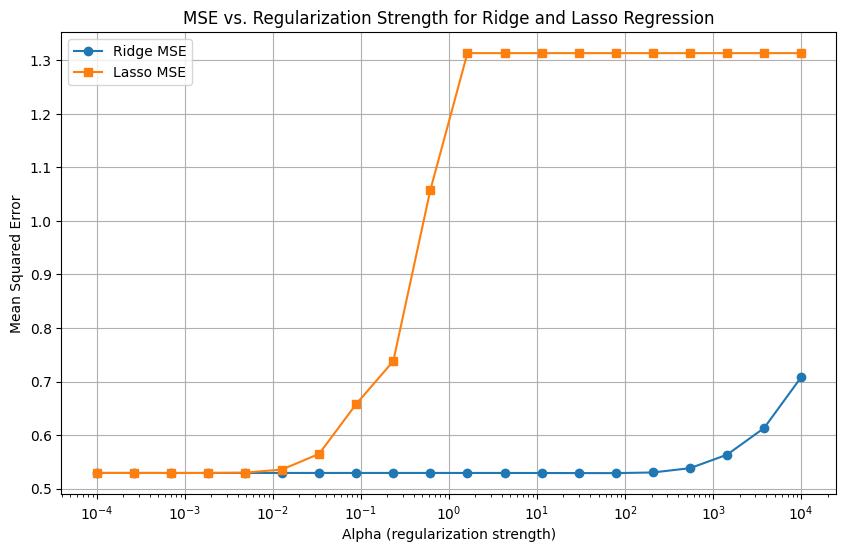

In [36]:
# Range of alpha values to explore
alphas = np.logspace(-4, 4, 20)

# Prepare to collect metrics
ridge_mses = []
lasso_mses = []

# Train and evaluate models
for alpha in alphas:
    # Ridge regression
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_reg.predict(X_test_scaled)
    ridge_mses.append(mean_squared_error(y_test, y_pred_ridge))
    
    # Lasso regression
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_reg.predict(X_test_scaled)
    lasso_mses.append(mean_squared_error(y_test, y_pred_lasso))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_mses, label='Ridge MSE', marker='o')
plt.plot(alphas, lasso_mses, label='Lasso MSE', marker='s')
plt.xlabel('Alpha (regularization strength)')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.title('MSE vs. Regularization Strength for Ridge and Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()


## K-fold cross-validation

In [43]:
# Setup k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [    0     1     2 ... 20637 20638 20639] TEST: [    4     6     7 ... 20621 20624 20629]
TRAIN: [    1     2     3 ... 20637 20638 20639] TEST: [    0     5     8 ... 20632 20634 20636]
TRAIN: [    0     1     2 ... 20634 20636 20638] TEST: [   16    24    34 ... 20635 20637 20639]
TRAIN: [    0     4     5 ... 20637 20638 20639] TEST: [    1     2     3 ... 20627 20628 20631]
TRAIN: [    0     1     2 ... 20636 20637 20639] TEST: [   14    15    18 ... 20622 20625 20638]


In [13]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_scaled_cons = sm.add_constant(X_train_scaled)

# Fit the OLS model using statsmodels
model = sm.OLS(y_train, X_train_scaled_cons)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3205.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        22:40:02   Log-Likelihood:                -18082.
No. Observations:               16512   AIC:                         3.618e+04
Df Residuals:                   16503   BIC:                         3.625e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0774      0.006    368.919      0.0